In [145]:
#import libraries
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [146]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.10f}'.format

In [147]:
df = pd.read_csv('../datasets/raw/pepeusdt_5m.csv')
df = df.sort_values(by='event_time')
df.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,1719606182967,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573022,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21865791172.0000000000,314,False,257149.5515482300,12380287280.0000000000,145601.3104659100,0
1,kline,1719606185966,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573024,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21974175367.0000000000,316,False,258425.2335233800,12488671475.0000000000,146876.9924410600,0
2,kline,1719606188444,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573025,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21984298991.0000000000,317,False,258544.3885778600,12498795099.0000000000,146996.1474955400,0
3,kline,1719606190966,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573026,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22480616291.0000000000,318,False,264386.0431988600,12995112399.0000000000,152837.8021165400,0
4,kline,1719606193719,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573028,0.0000117700,0.0000117600,0.0000117700,0.0000117400,22489454157.0000000000,320,False,264490.0614647800,13003608575.0000000000,152937.8021080600,0


In [148]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms')
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms')
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [149]:
df[df['event_time'].duplicated(keep=False)]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore


In [71]:
start_point = df[df['is_kline_closed'] == True].index[0]

In [72]:
end_point = df[df['kline_close_time'] == '2024-06-29 20:24:59.999'].index[-1]

In [73]:
df_csv = df.loc[start_point:end_point]

In [42]:
df_csv.to_csv("../datasets/processed/pepeusdt_5m_28_29_June_20_24.csv", index=False)

In [47]:
df.loc[25135:].head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
25135,kline,2024-06-29 20:25:00.007,PEPEUSDT,2024-06-29 20:20:00,2024-06-29 20:24:59.999,5m,131823979,131824398,0.0000115600,0.0000115600,0.0000115800,0.0000115300,22460672960.0000000000,420,True,259530.7935073700,10979528436.0000000000,126881.5042471900,0
25136,kline,2024-06-29 20:25:02.433,PEPEUSDT,2024-06-29 20:25:00,2024-06-29 20:29:59.999,5m,-1,-1,0.0000115600,0.0000115600,0.0000115600,0.0000115600,0.0000000000,0,False,0.0000000000,0.0000000000,0.0000000000,0
25137,kline,2024-06-29 20:25:10.041,PEPEUSDT,2024-06-29 20:25:00,2024-06-29 20:29:59.999,5m,131824399,131824399,0.0000115700,0.0000115700,0.0000115700,0.0000115700,86430423.0000000000,1,False,999.9999941100,86430423.0000000000,999.9999941100,0
25138,kline,2024-06-29 20:25:24.243,PEPEUSDT,2024-06-29 20:25:00,2024-06-29 20:29:59.999,5m,131824399,131824401,0.0000115700,0.0000115700,0.0000115700,0.0000115700,334325179.0000000000,3,False,3868.1423210300,334325179.0000000000,3868.1423210300,0
25139,kline,2024-06-29 20:25:26.434,PEPEUSDT,2024-06-29 20:25:00,2024-06-29 20:29:59.999,5m,131824399,131824425,0.0000115700,0.0000115700,0.0000115700,0.0000115700,2329906990.0000000000,27,False,26957.0238743000,2324176138.0000000000,26890.7179166600,0


In [79]:
df = df.sort_values(by='event_time')

df['time_diff_event_time'] = df['event_time'].diff()
df['event_time_seconds'] = df['time_diff_event_time'].dt.total_seconds()
df['event_time_seconds'] = df['event_time_seconds'].round().astype('Int64')

df['event_time_seconds'].sort_values(ascending=False).head()

52044    1616
24154      28
24917      28
26498      28
19692      26
Name: event_time_seconds, dtype: Int64

In [49]:
split_index = 52043
df = df.iloc[:split_index]

In [ ]:
df.to_csv("../datasets/processed/pepeusdt_5m_annotation.csv", index=False)

In [150]:
split_index = 52043
df1 = df.iloc[:split_index]
df2 = df.iloc[split_index:]

In [153]:
df1 = df1[df1['is_kline_closed'] == True]
df2 = df2[df2['is_kline_closed'] == True]

In [154]:
df1.head(12)['volume'].sum()

1017164820243.0

In [163]:
num_chunks = len(df1) // 12

summed_volumes = []
summed_nots = []
start_indices = []

for i in range(num_chunks):
    start_index = i * 12
    end_index = start_index + 12
    summed_volume = df1.iloc[start_index:end_index]['volume'].sum()   
    summed_not = df1.iloc[start_index:end_index]['number_of_trades'].sum() 
    summed_volumes.append(summed_volume)
    summed_nots.append(summed_not)
    start_indices.append(df1.iloc[start_index]['kline_start_time']) 

new_df1 = pd.DataFrame({
    'kline_start_time': start_indices,
    'volume_hourly': summed_volumes,
    'number_of_trades': summed_nots
})

new_df1.head()

,kline_start_time,volume_hourly,number_of_trades
0,2024-06-28 20:20:00,1017164820243.0000000000,33328
1,2024-06-28 21:20:00,573845917846.0000000000,11401
2,2024-06-28 22:20:00,443767958168.0000000000,9480
3,2024-06-28 23:20:00,561564678799.0000000000,12702
4,2024-06-29 00:20:00,555860771749.0000000000,13496


In [166]:
df2.head(12)['number_of_trades'].sum()

16727

In [165]:
num_chunks = len(df2) // 12

summed_volumes = []
summed_nots = []
start_indices = []

for i in range(num_chunks):
    start_index = i * 12
    end_index = start_index + 12
    summed_volume = df2.iloc[start_index:end_index]['volume'].sum()   
    summed_not = df2.iloc[start_index:end_index]['number_of_trades'].sum() 
    summed_volumes.append(summed_volume)
    summed_nots.append(summed_not)
    start_indices.append(df2.iloc[start_index]['kline_start_time'])  


new_df2 = pd.DataFrame({
    'kline_start_time': start_indices,
    'volume_hourly': summed_volumes,
    'number_of_trades': summed_nots
})
new_df2.head()

,kline_start_time,volume_hourly,number_of_trades
0,2024-06-30 20:20:00,633314643003.0000000000,16727
1,2024-06-30 21:20:00,374924833891.0000000000,11788
2,2024-06-30 22:20:00,1265515952935.0000000000,44366
3,2024-06-30 23:20:00,783513215883.0000000000,20379
4,2024-07-01 00:20:00,1267396236624.0000000000,26849


In [167]:
new_df = pd.concat([new_df1, new_df2])

new_df.reset_index(drop=True, inplace=True)

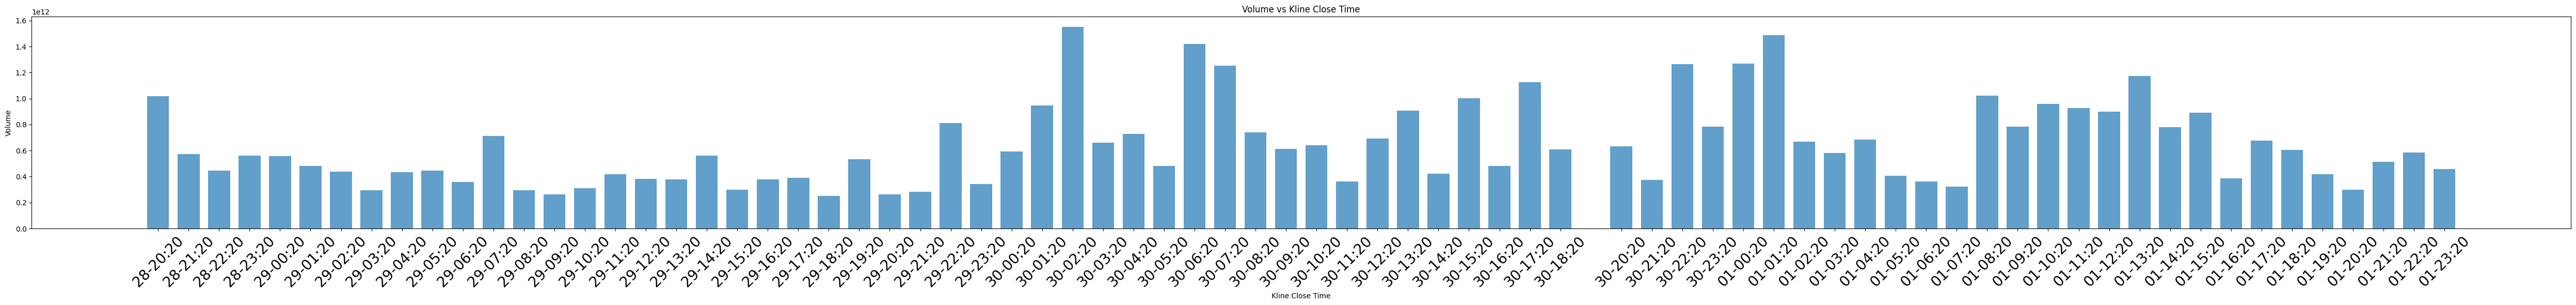

In [168]:
# measurement of peak hours
plt.figure(figsize=(50, 6))
plt.bar(new_df['kline_start_time'], new_df['volume_hourly'], width=0.03, align='center', alpha=0.7)
plt.xlabel('Kline Close Time')
plt.ylabel('Volume')
plt.title('Volume vs Kline Close Time')

# Set x-ticks to show day, hour, and minute
plt.xticks(new_df['kline_start_time'], new_df['kline_start_time'].dt.strftime('%d-%H:%M'), rotation=45, fontsize=20)
plt.tight_layout()

plt.show()

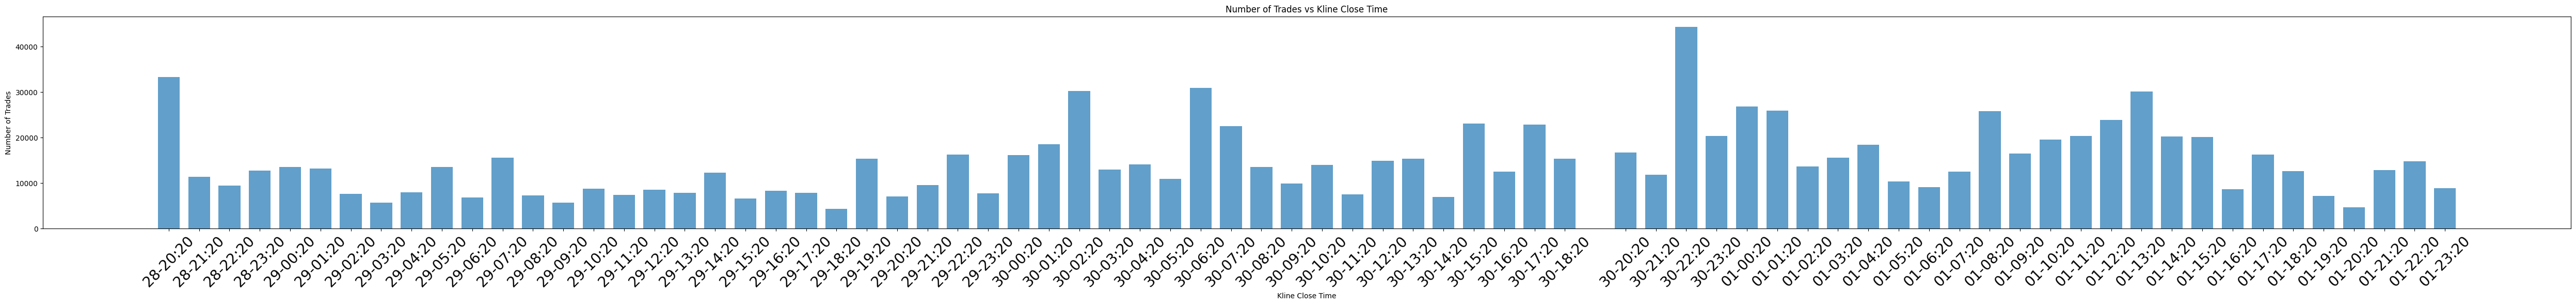

In [169]:
# measurement of peak hours
plt.figure(figsize=(50, 6))
plt.bar(new_df['kline_start_time'], new_df['number_of_trades'], width=0.03, align='center', alpha=0.7)
plt.xlabel('Kline Close Time')
plt.ylabel('Number of Trades')
plt.title('Number of Trades vs Kline Close Time')

# Set x-ticks to show day, hour, and minute
plt.xticks(new_df['kline_start_time'], new_df['kline_start_time'].dt.strftime('%d-%H:%M'), rotation=45, fontsize=20)
plt.tight_layout()

plt.show()

In [ ]:
import dash
from dash import dcc, html, Input, Output

df = df[df['is_kline_closed'] == True]

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='candlestick-chart',
        figure={
            'data': [
                go.Candlestick(
                    x=df['kline_start_time'],
                    open=df['open_price'],
                    high=df['high_price'],
                    low=df['low_price'],
                    close=df['close_price'],
                    name='Candlesticks'
                )
            ],
            'layout': {
                'title': 'Interactive Candlestick Chart',
                'xaxis_title': 'Date',
                'yaxis_title': 'Price',
                'xaxis_rangeslider_visible': True,  
                'width': 1200,  
                'height': 800,  
            }
        }
    ),
    html.Div(id='selected-points-info', style={'margin-top': 20})
])

selected_points = []


@app.callback(
    Output('selected-points-info', 'children'),
    [Input('candlestick-chart', 'clickData')]
)
def display_selected_points_info(clickData):
    global selected_points
    
    if clickData is not None and 'points' in clickData:
        
        selected_points.append(clickData['points'][0])
        
        
        if len(selected_points) > 2:
            selected_points = selected_points[-2:]  
        
        if len(selected_points) == 2:
            point1 = selected_points[0]
            point2 = selected_points[1]
            
            x1 = pd.to_datetime(point1['x'])  
            open1 = point1['open']
            high1 = point1['high']
            low1 = point1['low']
            close1 = point1['close']
            
            x2 = pd.to_datetime(point2['x']) 
            open2 = point2['open']
            high2 = point2['high']
            low2 = point2['low']
            close2 = point2['close']
            
           
            percentage_change = ((high2 - low1) / low1) * 100
            inv_500 = percentage_change * 5
            
            time_diff_minutes = (x2 - x1).total_seconds() / 60
            
            return html.Div([
                html.P(f'First Selected Point: Date={x1}, Low={low1}, Close={close1}'),
                html.P(f'Second Selected Point: Date={x2}, High={high2}, Close={close2}'),
                html.P(f'Percentage Change: {percentage_change:.2f}%'),
                html.P(f'Potential Profit 500: {inv_500:.2f} Euro'),
                html.P(f'Time Difference: {time_diff_minutes:.2f} minutes'),
                html.P(f'Profit / Min: {(inv_500 / time_diff_minutes):.2f}')
            ])
    
    return ''

if __name__ == '__main__':
    app.run_server(debug=True)
